# Introduction
- AutoML
- Automate ML workflow
- SageMaker AutoML:- AutoPilot

# Automated Machine Learning(AutoML)

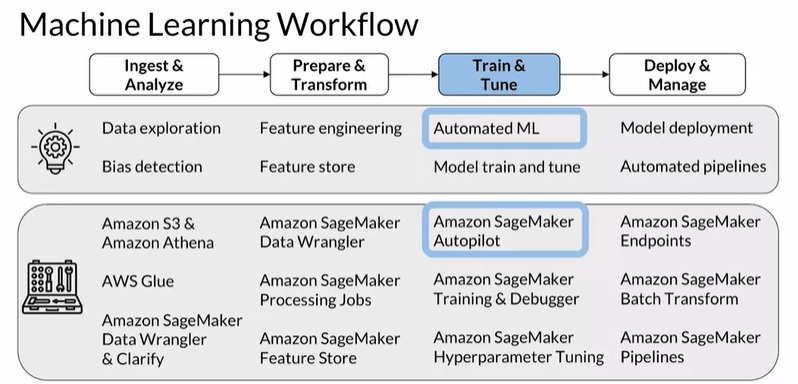

- Use case: - sentiment analysis of product review (multiclass classification)
- customer trends to spot
    - market change
    - customer behaviour change
- NLP:- product review:- sentiment: positive, negative, neutral

- Model building challenges
    - multiple iteration; reduce the time to market
    - lack of ML skillset in the team
    - take more time to iterate (automl offer ability to iterate quickly) to meet the objective metrics for success
    - scares resources
        - computational (on prem)
        - human resource
        
- AutoML automate some of these workforce
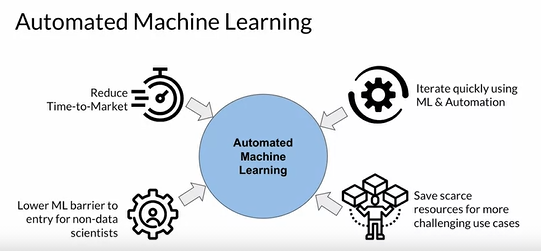

# AutoML Workflow

## Typical workflow
- ingest data
- anaylize data
    - understand your data
        - attirbution correlation
        - distribution issues (long-tails)
        - missing data
        - biases
    - select the right model/models
        - experiment models
            - eg xgboost
            - each algo, has some expectation of data

- prepare and transform the data
    - depending on the model
        - tree based model may prefer categorical features
        - in the use case
            - the independant variable is text
            - need to do some text trasformation
            - tokenization
            - n-grams
            - stemming
            - lemetization
            - tfidf (term frequency inverse document frequency)
            
    - Balance data
        - how to plan class imbalance
            - change performance metrics
            - generate synthetic data
            - chanage algoritham
            
    - tree based models are tolerant to class imbalance
        - hyper parameter to do better with class imbalance
        
    - train data
    - validation data 
        - evaluate the model 
        - after every epoch
        - at last
            
- train and tune the model
    - which combo of data, model, and hyper-parameter will result in best performance
    - in multiple iterations
    
    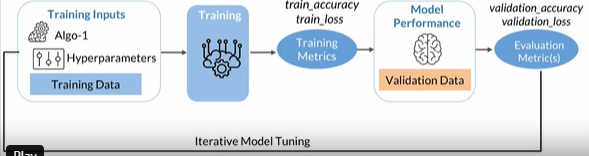
    <br>
    
    - goal for iteration (trying to optimize something)
        - accuracy
        - f1 score
    - need to iterate fast
        - training at scale comes in play
    
- deploy & manage


## AutoML
- comes on the train and tune stage
- tries to fit multiple models and tries to tune the hyper-parameters

- AutoML process
    - probelem identification
        - from the label, is it a classification/ regression
    - Algorithm selection
    - Data preprocessing
        - based on the selected algorithm, which features likely to do best
    - Hyper parameters
        - select a list of hyper-parameters
        - which combination, will result in the best output
        
        
## Scenarios for AutoML
- build model without any ML expertise
- build models at scale
    - 100s of model on data
- automate majority of work then scale

## Options
- best model only
    - best performing model
    - hard to explain
- best model, all candidates, full source code
    - how the model was built
    - refine for extra performance

# Amazon SageMaker Autopilot

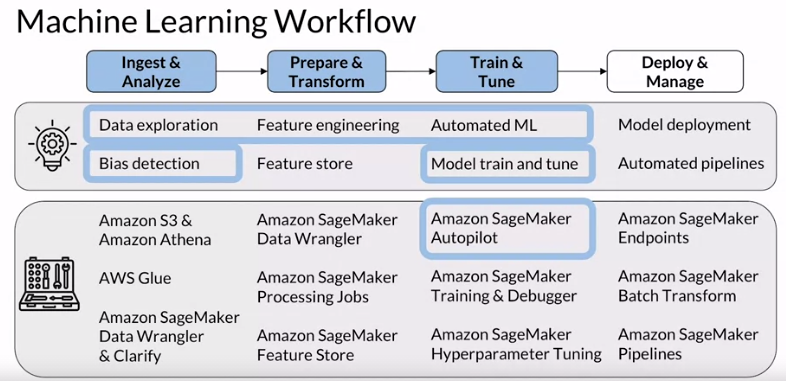

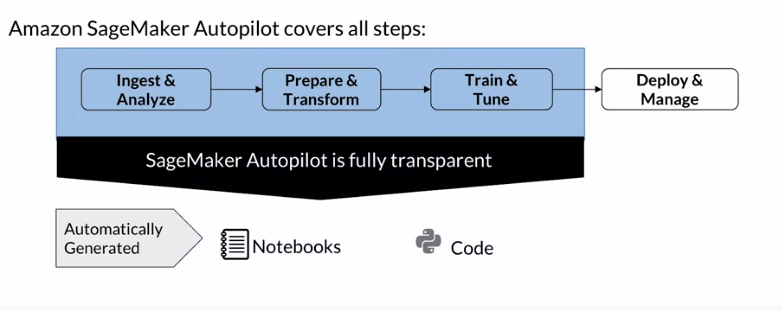

- Autopilot will generate
    - 2 jupyter notebook
    - data exploarion notebook
    - candidate generated notebook
        - feture generation
    - can handle feture imbalace data
    - as few as 500 data points

## Autopilot workflow

- need to upload the data into s3
- the data should contain the target attribute
- need to sepcify the target attribute when create Autopilot experiment
    - Autopilot will select,
        - the ML problem
        - choose the algoritham (based on input data and the target)
        - will support multiple algorithms,
            - linear learner
            - xgboost
            - a deeplearning algorithm
            
         - then generate a feature engineering code to trasform the data
         - 2 type of notebook
             - data explotarion notebook (what the autopiolot learned about the data. this also contain the shotfall of data, that require futher analysis, or investigation)
             - the second notebook is candidate generation notebook, contain each data preprocessing step.
             
         - area under the curve
         - area under the receiving characterstic curve
         - as object metrics to increse the efficiency of classification problems
         
     - Autopilot config
         - complet auto
             - automaiticall generate feature and build the model and tuning
             
         - diff degrees of human intervention
             - useful when the user need to look at the candiate generation notebook, and need to select which one to use
             
     - Leader board
         - best perfroming model
         - with scores

## Running experiments with Amazon SageMaker Autopilot

- interacting with Autopilot
    - programatically
        - AWS CLI
        - AWS SDK
        - Amazon SageMaker Python SDK
        
    - SageMaker Studio
        - click through experience
        
    - both case we are using same APIs
    - code

In [ ]:
automl = sagemaker.automl.AutoML(
    target_attribute_name = ...,
    output_path=...,
    max_candiates=3,
    role=role,
    max-runtime_per_training_job_in_seconds=1200, # max time a training job is allowed to run
    total_job_runtime_in_seconds=7200 # max automl job runtime in seconds
)

automl.fit(
    inputs=..., #location of s3 for input data
)

- role -> defined in IAM
    - role should have the permission needed to lauch the services the 
    
- the same can be performed using a click through exp
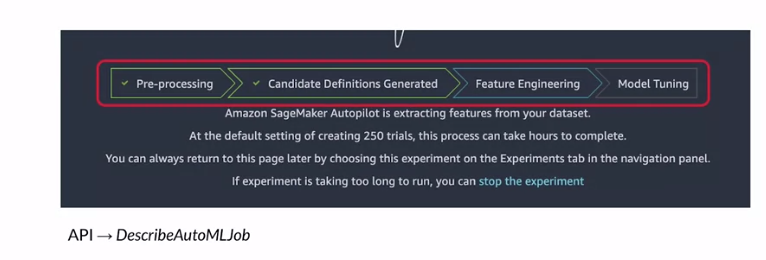

- monitor the job
    - describe job API call
    - or though studio environment
    
- Use case
    - independent variable -> text
    - dependent  -> categories (positive, negative, neutral)
    - the autopilot will change the text to neumerical attributes
    - diff ways to perfrom the feture trasformation
    - in this case
        - multi column Tfidf Vectorizer
        - tf
            - bag of words
            - all text in a bag
            - sample with replacement
            - how many times the word in the corpus
            - words weight
            - tf is the relative frequency in the word in a document
            - ratio (no of times a world in the doc/ total number of words)
        - idf
            - how important a word is by looking at the whole corpus
                - rare word/ frequently occuring word
                - log(no of words in the corpus/no of times the word in the corpus)
            - inc the weight of rare words
            - dec the weight of frequently occuring words (the, of these kind of words)
            

# Amazon SageMaker Autopilot: evaluating output

- resources and artifacts generated by Autopilot
- several resources and artifacts are generated

    - codes
        - data transformation code
        - configuration code for setting up job and transfromations
        
    - notebooks
        - data exploration
        - candidate generation
            - candidate models
                - data preprocess
                - alogiritham
                - hyper-parameter
                
    - Trasformed data
        - data trasformation code is used for trasforming the data
        
- all these resources are stored in the s3 bucket configured during the job

- autopilot will run through a number of experiments
- goal is to find the best model
- trained model is also stored in s3

- leader board
    - which candidate is performing the best
    
    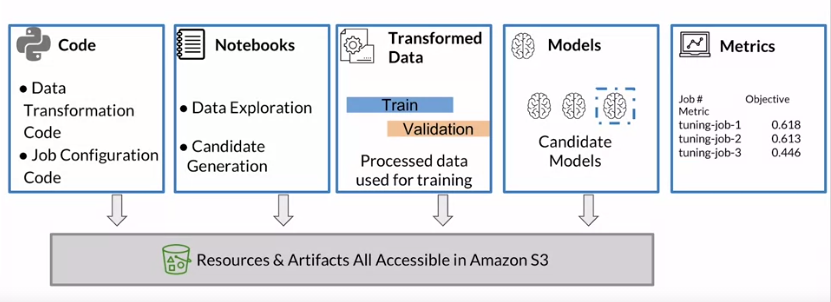
    
 - notebooks can be accessed through s3 or from studio console
 

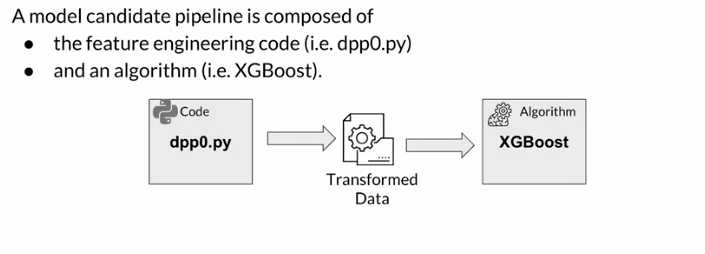

# Amazon SageMaker Autopilot demo

- SageMaker Studio
    - to launch an autopilot experiment, go to sagemaker studio, select the 'new autopiilot experiment'
    - need to give the same configureation options we have given when launching it programatically
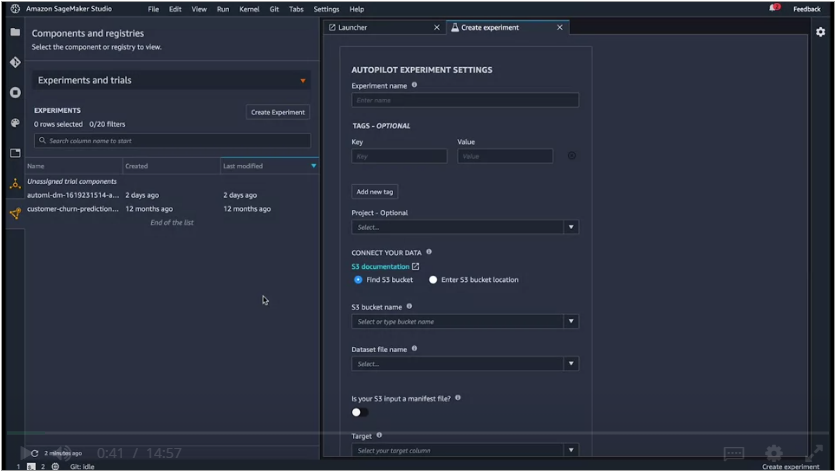

- SageMaker Studio
    - after define the selection click on the create experiment button at the bottom
    
    
## Resources and Artifacts produced by Autopilot job

- all the things happend in an autopilot will happen in an experiment
- to view the experiment
    - go to the last icon in the sagemaker studio; components and registration
    - on the dropdown top window, you have to select experiments and trials
    - this will listdown all the experiments
    - right click on the experiment
    
    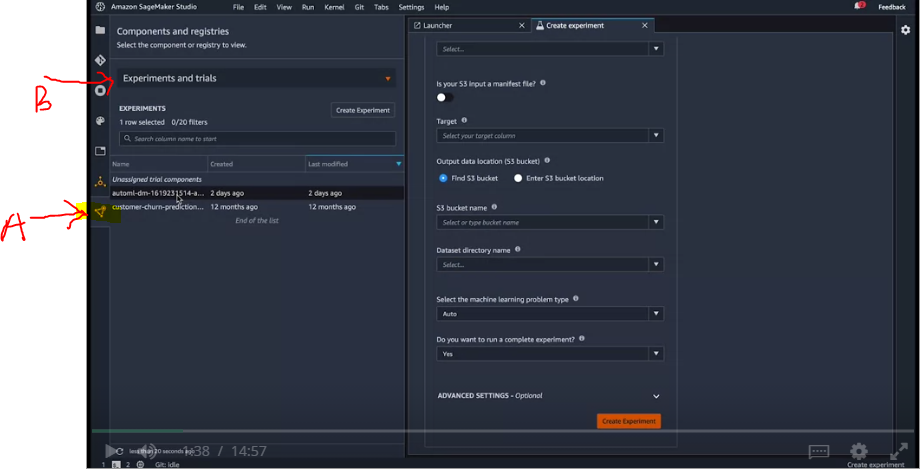
    
    - select describe automl job
    - can see the trail, status
        - trial is a tuning job; automatic hyper-parameter tuning
    - can see the best performing model with a yellow star
    
    - right click on the trial, then select the model detials will take you to more details.
    - you can see the input artifacts on the resources tab
    -
- Data Exploaraion Notebook
    - 
- Candidate Generateion Notebook
    - diff candidate for model
    - read only model (can not be executed)
    - can save a local copy
        - select a kernel (python3 datascience)
        
- candidate pipelines
    - each pipleline contains
        - data preprocessing
        - algoritham
        - hyper-parameter tuning
    - to find the best model, accourding to the objective merics

# Model hosting

- once identified the best perfroming model
- 2 ways of deployment
    - batch deployment
    - real-time deployment


- real-time
    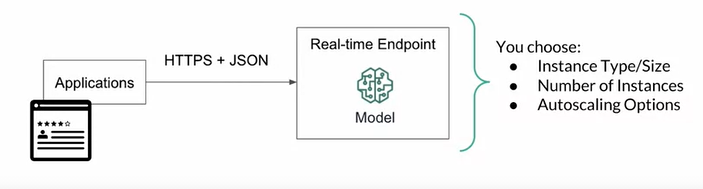

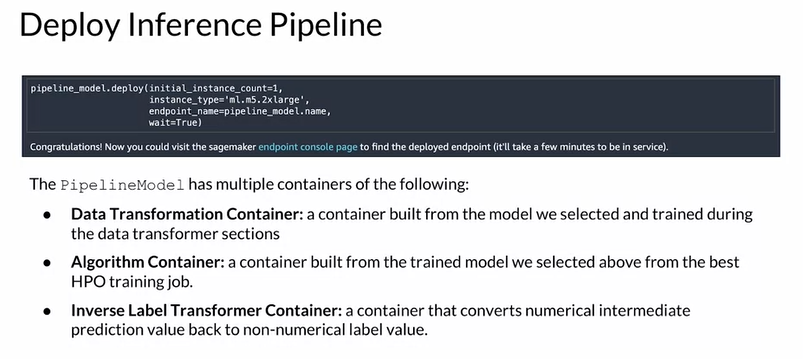

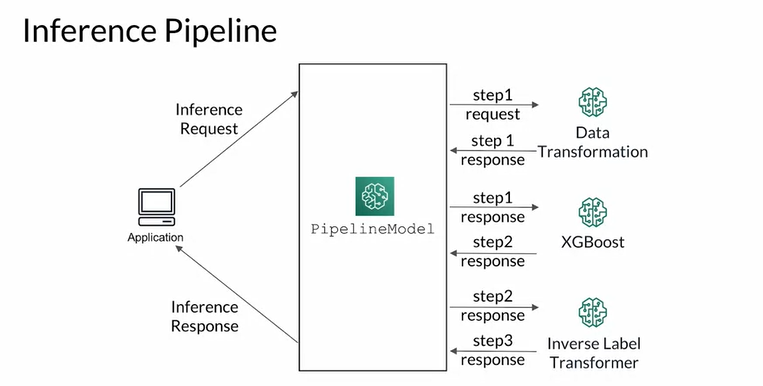

# Additional Reading Materials

If you wish to dive more deeply into the topics covered this week, feel free to check out these optional references. (You won’t have to read these to complete this week’s practice quizzes.)

- [Amazon SageMaker Autopilot](https://aws.amazon.com/sagemaker/autopilot/)